`참고: 덕성여대 Nano-degree 교과 <언어 빅데이터 이해와 활용>,<언어 빅데이터>`
```
작성자: 박민준
참고문헌:
Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.".
이기창. 한국어 임베딩. 에이콘.
朴敏浚. (2016). 面向初学者的中文信息处理平台构建及应用. 数字化汉语教学.
```
* https://www.nltk.org/book/
* https://koreanname.me/name

# 1. Names Corpus
* 한국어 이름 말뭉치의 성별 특징을 살펴보기
* https://www.nltk.org/book/ch02.html#sec-lexical-resources

In [1]:
# 한국어 이름 말뭉치 다운로드
!git clone https://github.com/karmalet/names_kor.git

Cloning into 'names_kor'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (21/21), 74.59 KiB | 4.66 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# 현재 작업 폴더(working directory) 보이기
!pwd

/content


In [2]:
import nltk
from nltk.corpus.reader import WordListCorpusReader

In [3]:
names = WordListCorpusReader('names_kor','.*\.txt')
# .txt 파일 읽기

In [4]:
names.fileids()

['female_ko.txt', 'male_ko.txt']

In [5]:
male_names = names.words('male_ko.txt')
female_names = names.words('female_ko.txt')

In [6]:
female_names[:5]

['서윤', '서연', '지우', '하윤', '서현']

In [ ]:
male_names[:5]

['민준', '서준', '도윤', '예준', '시우']

In [7]:
# cfd[condition][word] += 1
# 조건=성별, 토큰=마지막 문자
cfd = nltk.ConditionalFreqDist(
           (fileid, name[-1])
           for fileid in names.fileids()
           for name in names.words(fileid))

In [8]:
cfd.items()

dict_items([('female_ko.txt', FreqDist({'아': 110, '희': 109, '나': 105, '영': 81, '은': 78, '이': 78, '미': 78, '리': 77, '경': 75, '현': 71, ...})), ('male_ko.txt', FreqDist({'현': 98, '준': 92, '민': 89, '호': 84, '우': 83, '원': 76, '윤': 74, '찬': 73, '율': 72, '빈': 69, ...}))])

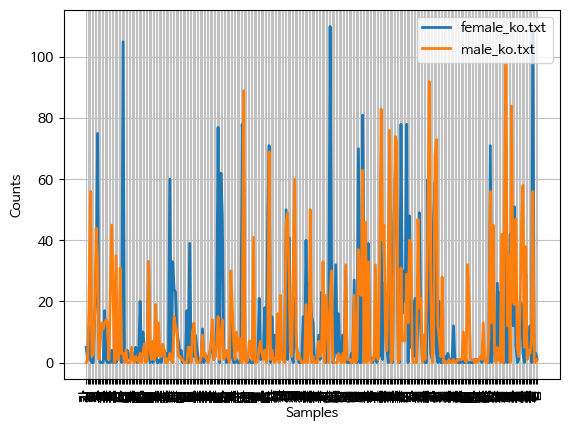

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# 남성/여성 이름 별 어미(word[-1])의 빈도표 작성
cfd.plot()

### (한글 깨짐 오류 처리)  한글 폰트 다운로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,234 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

* 런타임 재시작 후 아래 실행

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 2. 자동 성별 분류기 구축

1. A training set of m labeled documents (d1,c1),....,(dm,cm)


In [9]:
labeled_names = ([(name, 'male') for name in names.words('male_ko.txt')] +
 [(name, 'female') for name in names.words('female_ko.txt')])

In [ ]:
len(labeled_names)  # 데이터셋 7600개

7600

In [10]:
labeled_names[:10]

[('민준', 'male'),
 ('서준', 'male'),
 ('도윤', 'male'),
 ('예준', 'male'),
 ('시우', 'male'),
 ('하준', 'male'),
 ('지호', 'male'),
 ('주원', 'male'),
 ('지후', 'male'),
 ('준우', 'male')]

* 남녀 이름이 고루 분포하도록 말뭉치를 섞기

In [11]:
import random
# random seed를 줌으로써, 랜덤이되 매번 똑같은 결과 나오도록 함.
random.Random(4).shuffle(labeled_names)

2. Split Train and Test set

In [ ]:
def gender_features(word):
  return {'last_letter': word[-1]}

In [ ]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[600:], featuresets[:600]

In [ ]:
print(len(train_set), len(test_set))

7000 600


3. 베이즈 분류기`nltk.NaiveBayesClassifier` 학습

In [ ]:
# .train 메소드로 학습이 끝나면, 학습된 분류기(classifier)를 반환.
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
classifier.classify(gender_features('민준'))

'male'

##### 시험지(test set)에서 문제 하나씩 골라서 풀어보자

In [ ]:
labeled_names[:600]

[('엠마', 'female'),
 ('단후', 'male'),
 ('남일', 'male'),
 ('도훈', 'male'),
 ('덕규', 'male'),
 ('순범', 'male'),
 ('윤이', 'female'),
 ('유석', 'male'),
 ('예승', 'male'),
 ('승지', 'male'),
 ('도원', 'female'),
 ('태평', 'male'),
 ('루니', 'female'),
 ('도란', 'female'),
 ('묘정', 'female'),
 ('재진', 'female'),
 ('홍석', 'male'),
 ('민범', 'male'),
 ('아이린', 'female'),
 ('인설', 'female'),
 ('서후', 'male'),
 ('아요', 'female'),
 ('규린', 'female'),
 ('금채', 'female'),
 ('화', 'female'),
 ('여주', 'female'),
 ('솔', 'female'),
 ('남주', 'male'),
 ('새빈', 'female'),
 ('수오', 'male'),
 ('태광', 'male'),
 ('효민', 'female'),
 ('기주', 'female'),
 ('해민', 'female'),
 ('은재', 'female'),
 ('태검', 'male'),
 ('샘', 'male'),
 ('지완', 'female'),
 ('루야', 'female'),
 ('로건', 'male'),
 ('나인', 'female'),
 ('조현', 'male'),
 ('이정', 'male'),
 ('강아', 'female'),
 ('무혁', 'male'),
 ('오늘', 'female'),
 ('정협', 'male'),
 ('동윤', 'female'),
 ('서정', 'male'),
 ('명준', 'male'),
 ('성권', 'male'),
 ('유니스', 'female'),
 ('사율', 'male'),
 ('민경', 'female'),
 ('리카', 'female'),
 ('반야', 

In [ ]:
for name, gender in labeled_names[:10]:
  print(name, gender)
  # 모델이 추측(추론)한 성별
  predicted = classifier.classify(gender_features(name))
  print(f'추론 결과: {predicted}')

엠마 female
추론 결과: male
단후 male
추론 결과: male
남일 male
추론 결과: male
도훈 male
추론 결과: male
덕규 male
추론 결과: male
순범 male
추론 결과: male
윤이 female
추론 결과: female
유석 male
추론 결과: male
예승 male
추론 결과: male
승지 male
추론 결과: female


In [ ]:
# 학습된 베이즈 분류기(모델)이 unseen data를 분류할 때, 얼마나 정확한지?
print(nltk.classify.accuracy(classifier, test_set))

0.7383333333333333


### 정답 맞추는데 가장 크게 기여한 특징(most informative features)이 뭐였어?

In [ ]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = '건'              male : female =     30.8 : 1.0
             last_letter = '나'            female : male   =     29.0 : 1.0
             last_letter = '석'              male : female =     28.2 : 1.0
             last_letter = '라'            female : male   =     23.3 : 1.0
             last_letter = '욱'              male : female =     23.2 : 1.0
             last_letter = '찬'              male : female =     18.9 : 1.0
             last_letter = '훈'              male : female =     14.6 : 1.0
             last_letter = '상'              male : female =     13.6 : 1.0
             last_letter = '용'              male : female =     12.8 : 1.0
             last_letter = '산'              male : female =     10.5 : 1.0


In [ ]:
classifier._feature_probdist[('male', 'last_letter')].prob('건')

0.012945415721339917

In [ ]:
classifier._feature_probdist[('female', 'last_letter')].prob('건')

0.00042058040095331557

In [ ]:
# show_most_informative_features 의 수치는 무엇을 뜻하나요?
def informative_(feature):
  p_male = classifier._feature_probdist[('male', 'last_letter')].prob(feature)
  p_female = classifier._feature_probdist[('female', 'last_letter')].prob(feature)
  return max(p_male,p_female)/min(p_male,p_female)

In [ ]:
f"{informative_('건'):.1f}" # male : female =     30.8 : 1.0

'30.8'

# 3. (과제) 특징 공학(Feature Engineering)
* 모델이 학습할 특징(feature)를 최적화하면 정확도가 향상된다
* 좋은 특징? - 남/여 두 가지 category의 확연한 차이점


### 좋은 특징을 선별해서 모델을 개선해 보자
* 자모[Jamo](https://github.com/JDongian/python-jamo)를 활용해서 특징을 좀 더 세분화해보기
* 그리고 그것을 통해 모델 학습을 해 보기

In [12]:
!pip install jamo

In [13]:
from jamo import h2j, j2hcj

* 한글 자모로 잘게 쪼개기

In [ ]:
labeled_names[:3]

[('엠마', 'female'), ('단후', 'male'), ('남일', 'male')]

In [14]:
jm = h2j('엠마')

In [15]:
[i for i in jm]

['ᄋ', 'ᅦ', 'ᆷ', 'ᄆ', 'ᅡ']

In [16]:
j2hcj(h2j('엠마'))

'ㅇㅔㅁㅁㅏ'

In [17]:
b = []
for ch in '엠마':
  b.append(j2hcj(h2j(ch)))
print(b)

['ㅇㅔㅁ', 'ㅁㅏ']


In [ ]:
b[0][2]

'ㅁ'

* 초성, 중성, 종성 인식하기

In [18]:
from jamo import get_jamo_class

In [19]:
[get_jamo_class(j) for j in jm]

['lead', 'vowel', 'tail', 'lead', 'vowel']

### 어떤 자모들을 특징(feature)로 삼을 것인가?
* 아래에서 gender_features 함수를 정의하여 본인이 원하는 특징만 선별하여 보세요

In [20]:
def gender_features(word):
  # 각 철자의 초성, 종성을 모음
  split_word = []
  features = {}

  for ch in word:
    split_word.append(j2hcj(h2j(ch)))
  i = 1
  for w in split_word:
    features['lead_' + str(i)] = w[0]
    if len(w) == 3:
      features['tail_' + str(i)] = w[2]
    i = i + 1
  return features

In [21]:
# 가령, 특징을 아래와 같이 마지막 단어의 초성(lead), 중성(vowel), 종성(tail)로 설정했다면,
# 위의 gender_features 함수를 이에 맞도록 커스터마이징 합니다.
gender_features('엠막')

{'lead_1': 'ㅇ', 'tail_1': 'ㅁ', 'lead_2': 'ㅁ', 'tail_2': 'ㄱ'}

### 모델 학습

2. Split Train and Test set

In [22]:
featuresets = [(gender_features(n.strip()), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[600:], featuresets[:600]

3. 베이즈 분류기`nltk.NaiveBayesClassifier` 학습

In [23]:
# .train 메소드로 학습이 끝나면, 학습된 분류기(classifier)를 반환.
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [24]:
for name, gender in labeled_names[:10]:
  print(name, gender)
  # 모델이 추측(추론)한 성별
  predicted = classifier.classify(gender_features(name))
  print(f'추론 결과: {predicted}')

엠마 female
추론 결과: female
단후 male
추론 결과: male
남일 male
추론 결과: female
도훈 male
추론 결과: male
덕규 male
추론 결과: male
순범 male
추론 결과: female
윤이 female
추론 결과: female
유석 male
추론 결과: male
예승 male
추론 결과: male
승지 male
추론 결과: male


In [25]:
# 학습된 베이즈 분류기(모델)이 unseen data를 분류할 때, 얼마나 정확한지?
# 자모로 분리하기 이전의 모델 성능 = 0.74
# 기존의 모델보다 얼마나 정확도(accuracy)가 올라갔는지? 0.03 증가
print(nltk.classify.accuracy(classifier, test_set))

0.635


In [ ]:
# 어떤 특징들이 남/여 구분에 도움이 되는지? -> 초성이 종성보다 성별 구분에 더 영향을 주고, 두 번째 철자가 첫째나 세번째보다 영향을 더 많이 끼침
classifier.show_most_informative_features(10)

Most Informative Features
                  lead_2 = 'ㅌ'              male : female =     20.0 : 1.0
                  lead_3 = 'ㄴ'            female : male   =     18.7 : 1.0
                  tail_2 = 'ㅂ'              male : female =     16.8 : 1.0
                  lead_3 = 'ㄹ'            female : male   =      9.6 : 1.0
                  tail_2 = 'ㄱ'              male : female =      7.1 : 1.0
                  lead_2 = 'ㄴ'            female : male   =      5.7 : 1.0
                  lead_3 = 'ㅁ'            female : male   =      4.5 : 1.0
                  tail_1 = 'ㄱ'              male : female =      4.3 : 1.0
                  lead_2 = 'ㅊ'              male : female =      4.1 : 1.0
                  tail_2 = 'ㅊ'            female : male   =      3.4 : 1.0
